In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('economic_index.csv')

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24 non-null     int64  
 1   year               24 non-null     int64  
 2   month              24 non-null     int64  
 3   interest_rate      24 non-null     float64
 4   unemployment_rate  24 non-null     float64
 5   index_price        24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.3 KB


In [5]:
df.isnull().sum()

Unnamed: 0           0
year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

Dropping unnecessary columns

In [7]:
df.drop(columns=['Unnamed: 0','year','month'],axis = 1,inplace = True)

In [8]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


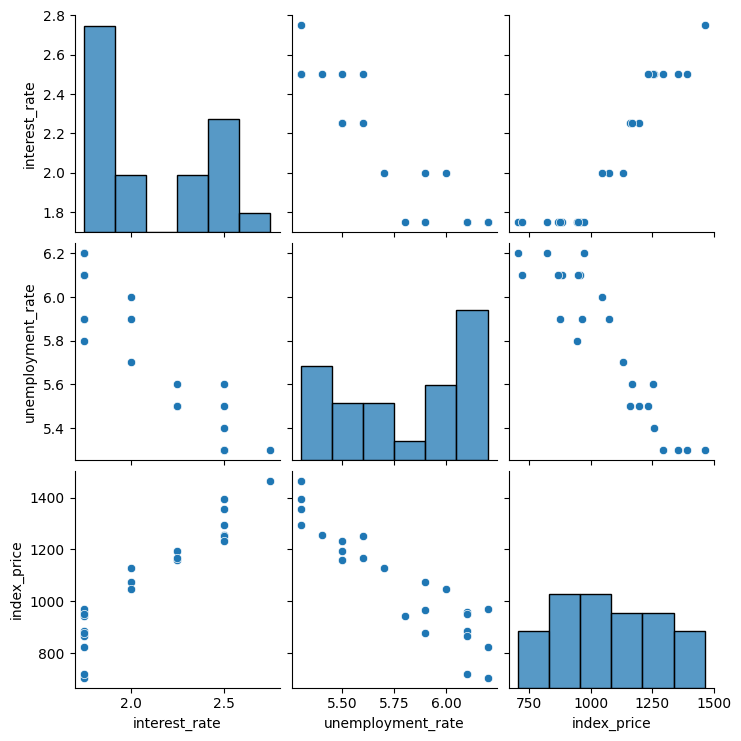

In [9]:
sns.pairplot(df)

In [10]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unmployment rate')

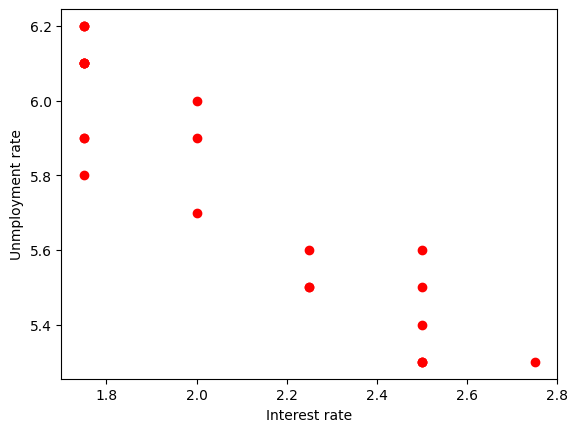

In [ ]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color = 'r')
plt.xlabel('Interest rate')
plt.ylabel('Unemployment rate')
#This will have negative correlation

In [15]:
X = df[['interest_rate','unemployment_rate']] 
Y = df['index_price']

In [16]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.25, random_state= 42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

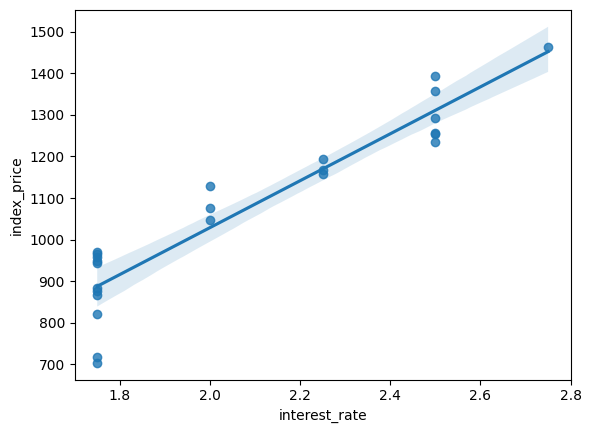

In [21]:
sns.regplot(x = df['interest_rate'],y = df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

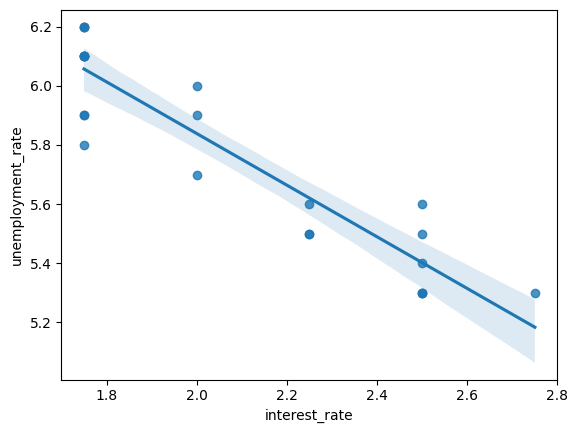

In [22]:
sns.regplot(x = df['interest_rate'], y = df['unemployment_rate'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

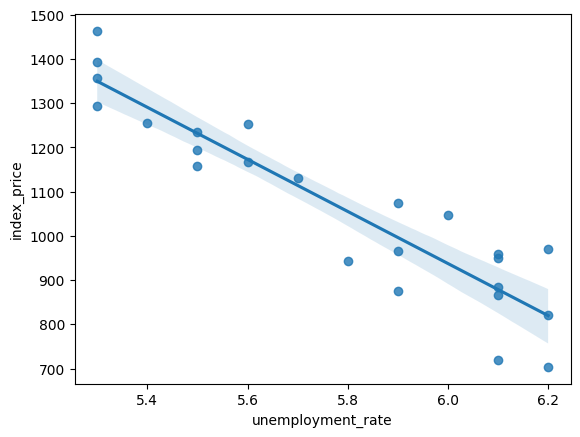

In [23]:
sns.regplot(x = df['unemployment_rate'], y = df['index_price'])

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train

,interest_rate,unemployment_rate
13,1.75,5.9
1,2.50,5.3
21,1.75,6.2
5,2.50,5.6
2,2.50,5.3
12,2.00,6.0
15,1.75,6.1
3,2.50,5.3
4,2.50,5.4
22,1.75,6.2


In [26]:
X_test

,interest_rate,unemployment_rate
8,2.25,5.5
16,1.75,6.2
0,2.75,5.3
18,1.75,6.1
11,2.00,5.9
9,2.25,5.6


In [27]:
l_regression = LinearRegression()

In [28]:
l_regression.fit(X_train, Y_train)

LinearRegression()

In [84]:
l_regression.coef_

array([ 260.33709119, -360.58377051])

In [82]:
l_regression.intercept_

np.float64(2601.67998660565)

Performing cross validation

In [32]:
from sklearn.model_selection import cross_val_score
c_v_s = cross_val_score(l_regression,
                        X_train,Y_train,
                        scoring = 'neg_mean_squared_error',
                        cv = 3)

In [ ]:
c_v_s  

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [ ]:
np.mean(c_v_s) #closer to 1 indicated better performace

np.float64(-5914.828180162386)

In [35]:
y_pred = l_regression.predict(X_test)

In [36]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

Performance metrics

In [45]:
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test,y_pred)
print("mean squared error: ", mse)
print("mean absolute error: ", mae)
print("root mean squared error: ", rmse)
print('R2 score: ', r2)
print(r2*100,"%")

mean squared error:  5793.762887712549
mean absolute error:  59.93578152323547
root mean squared error:  76.11677139574792
R2 score:  0.8278978091457151
82.78978091457151 %


Prediction on unseen data

In [54]:
interest_rate = 100
unemployment_rate = 200
l_regression.predict(scaler.transform([[interest_rate,unemployment_rate]]))

C:\Users\namir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2601.67998661])

Assumptions

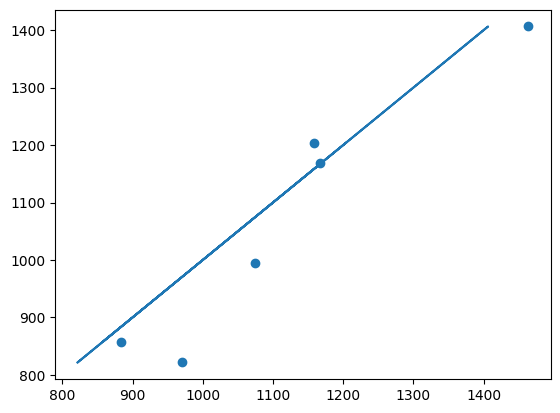

In [ ]:
plt.scatter(Y_test,y_pred)
plt.plot(y_pred,l_regression.predict(X_test))
#here Y_test and y_pred has linear relationship so we can also say out model has peformed well

In [ ]:
residual = Y_test- y_pred
residual

(8     1159
 16     971
 0     1464
 18     884
 11    1075
 9     1167
 Name: index_price, dtype: int64,
 array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
         994.90992298, 1168.16932693]))

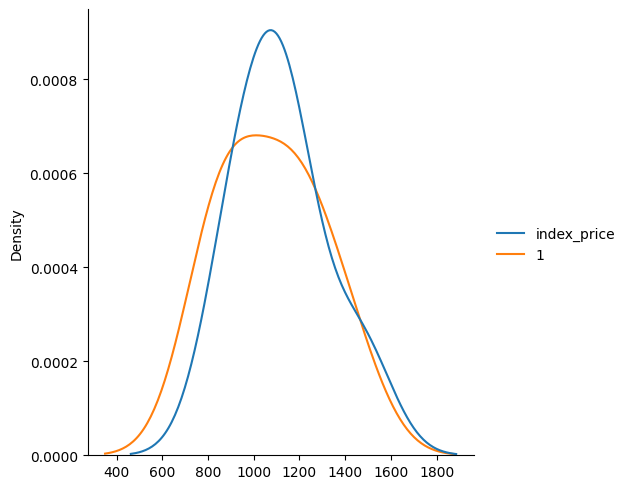

In [76]:
sns.displot(residual,kind = 'kde')
#Here if we get a normal distirbution then we can say that the model that we created is good

In [ ]:
plt.scatter(y_pred,residual)
#If the data points are uniformly distributed i.e. not following any kind of pattern then it is a good sign